# Using Dask for Arrays

This post includes code from [Scalable-Data-Analysis-in-Python-with-Dask](https://github.com/PacktPublishing/-Scalable-Data-Analysis-in-Python-with-Dask/tree/master/Section%202).

In [1]:
import numpy as np
import dask.array as da

In [2]:
np_arr = np.random.randint(20, size=20)
np_arr

array([12, 18, 17,  7,  5,  9, 11,  3,  5, 15, 13, 13,  5, 12, 11, 16,  4,
       10,  9,  7])

In [5]:
dask_arr = da.random.randint(20, size=20, chunks=5)

In [6]:
dask_arr

dask.array<randint, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [8]:
## This is simply because Dask does lazy evaluaion.   
### You need to call `compute()` to start the execution

In [7]:
dask_arr.compute()

array([ 3, 17,  5, 11, 19, 14, 14, 11,  9, 18,  9,  7, 10, 13, 10, 10, 11,
       10,  9,  2])

In [9]:
dask_arr.chunks

((5, 5, 5, 5),)

In [10]:
dask_arr_from_np = da.from_array(np_arr, chunks=5)

In [11]:
dask_arr_from_np

dask.array<array, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [12]:
dask_arr_from_np.compute()

array([12, 18, 17,  7,  5,  9, 11,  3,  5, 15, 13, 13,  5, 12, 11, 16,  4,
       10,  9,  7])

In [ ]:
### array operations into a graph to tasks
#### See : http://docs.dask.org/en/latest/graphviz.html

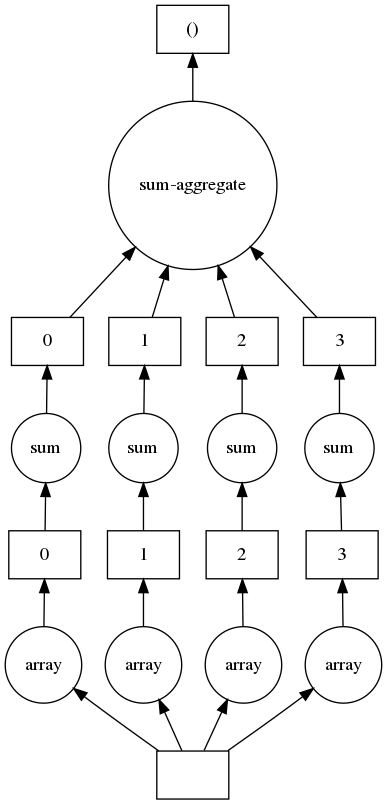

In [13]:
dask_arr_from_np.sum().visualize()

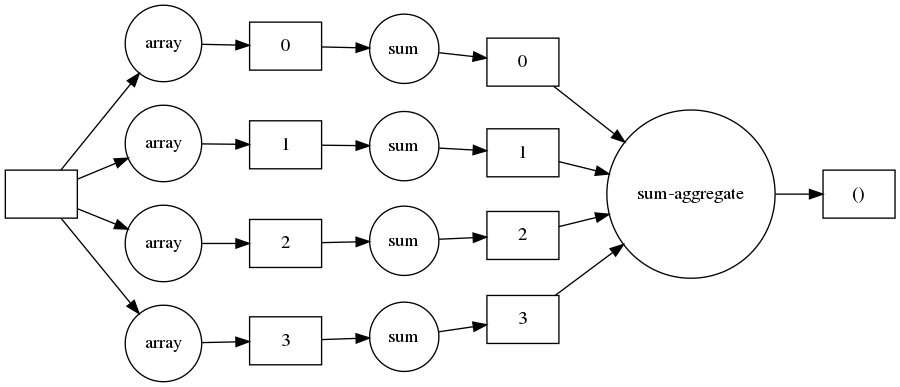

In [14]:
dask_arr_from_np.sum().visualize(rankdir="LR")

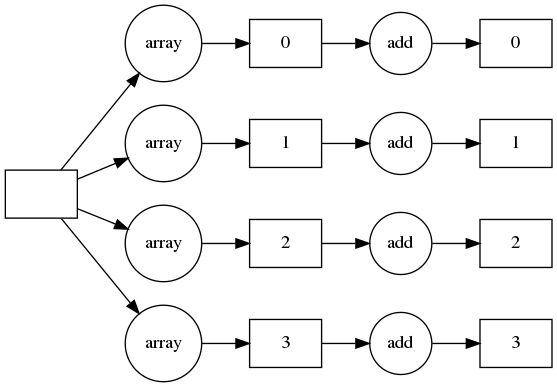

In [15]:
(dask_arr_from_np+1).visualize(rankdir="LR")

In [16]:
dask_arr_mean = da.mean(dask_arr_from_np)
dask_arr_mean.compute()

10.1

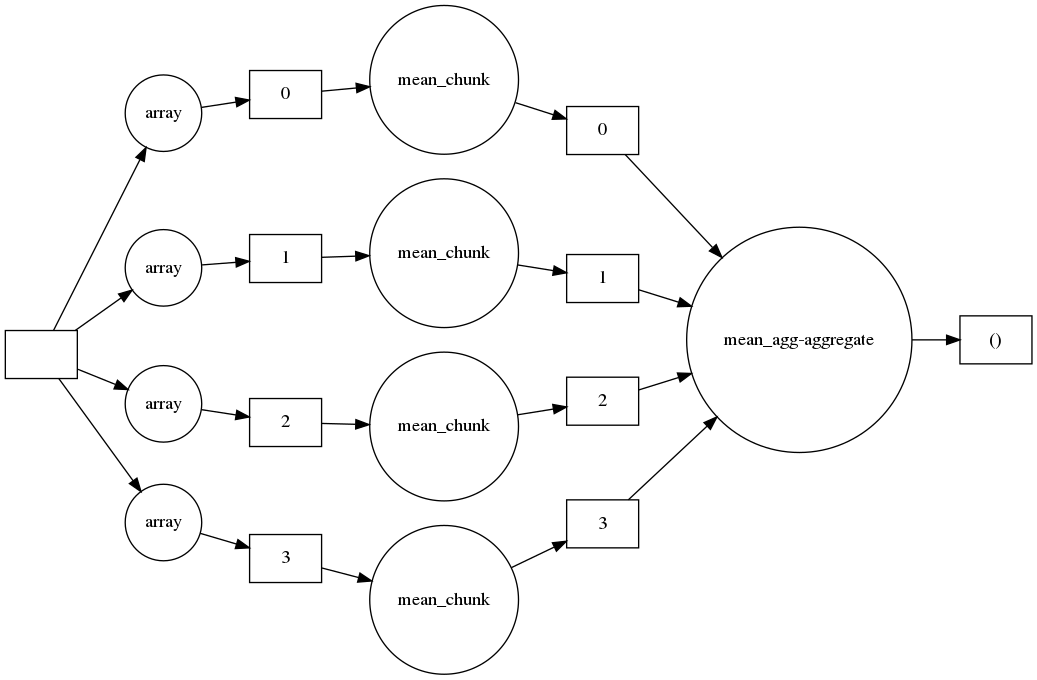

In [17]:
dask_arr_mean.visualize(rankdir="LR")

In [18]:
x = da.random.random(10, chunks=2)
y = da.random.random(10, chunks=2)

sum_x_y = da.add(x, y) #similar to numpy.add
mean_x_y = da.mean(sum_x_y)

In [19]:
sum_x_y.compute()

array([0.96028343, 0.55946179, 1.11161829, 1.28233368, 0.53130934,
       0.86805782, 0.20173099, 0.77596276, 0.92576765, 1.04750609])

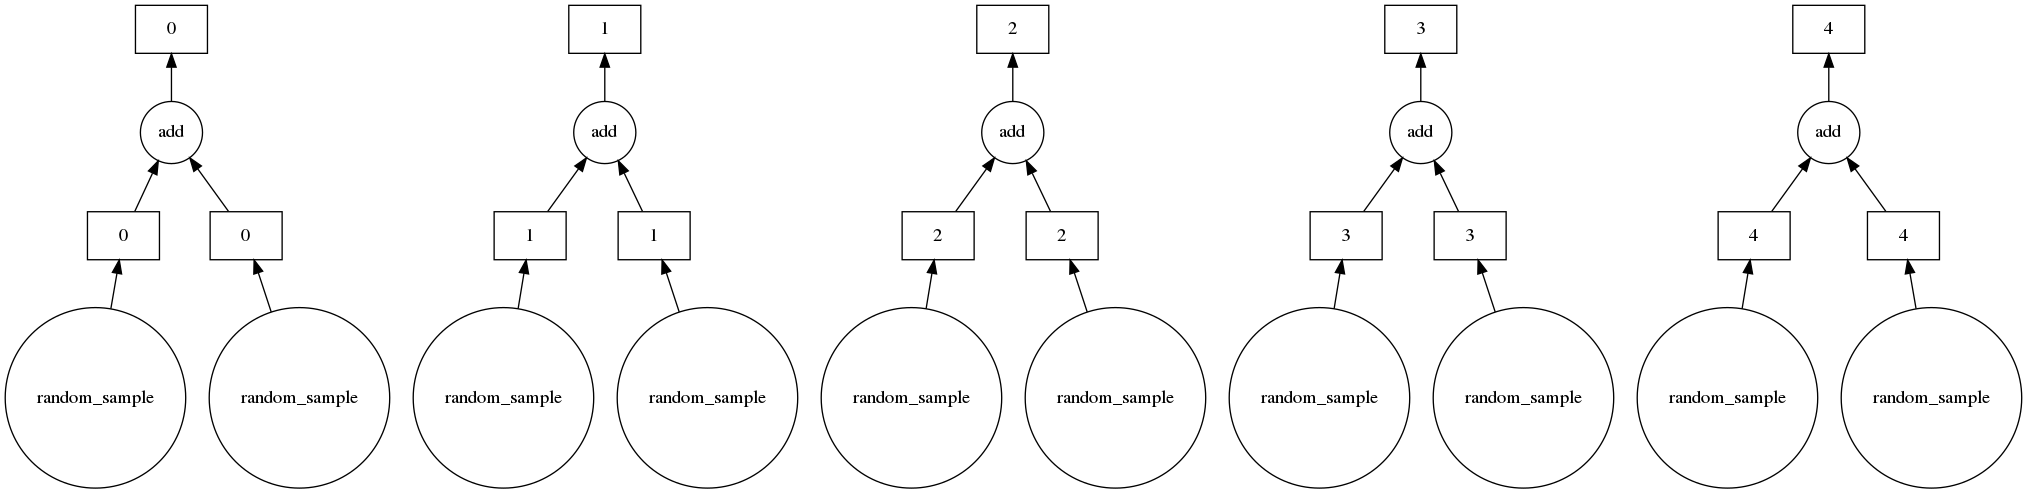

In [20]:
sum_x_y.visualize()

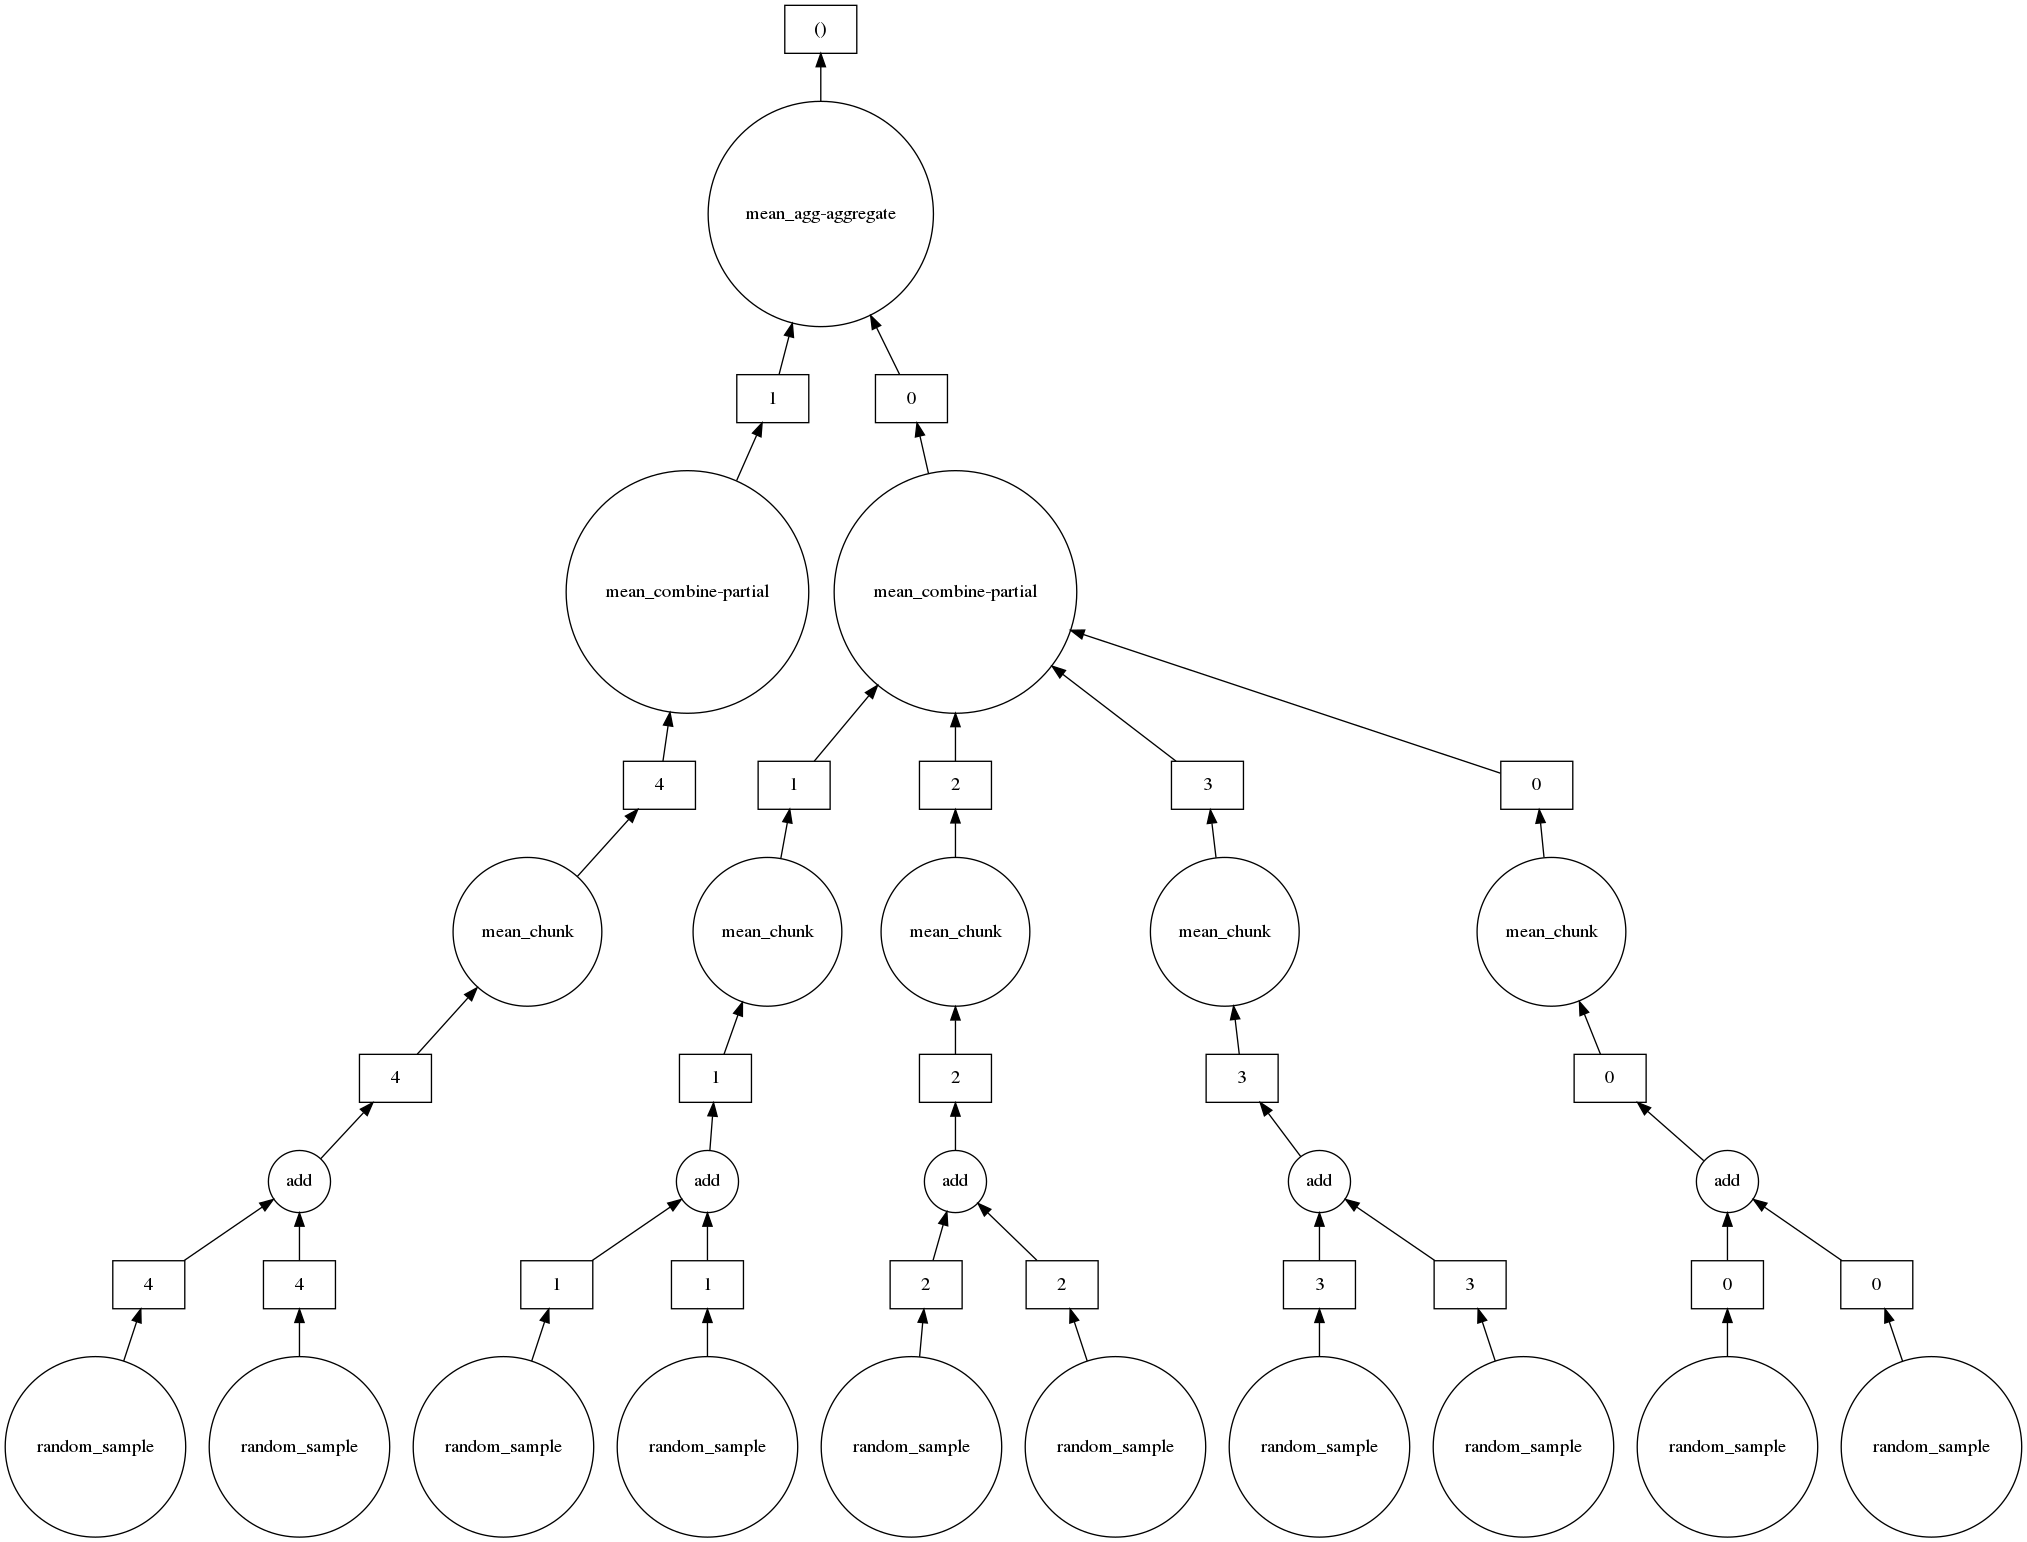

In [21]:
mean_x_y.visualize()

In [22]:
da_arr_large = da.random.randint(10000, size=(50000, 50000),
                                 chunks=(5000, 1000))   
da_sum_large = da_arr_large.sum()   

In [23]:
### Get no. bytes using `nbytes` : http://docs.dask.org/en/latest/array-api.html#dask.array.Array.nbytes

In [24]:
da_arr_large.nbytes  

20000000000

In [25]:
### Convert bytes to GB, 1Gb = 1e+9 bytes

In [26]:
da_arr_large.nbytes/1e+9

20.0

In [27]:
da_sum_large.compute()

12498643590734

In [ ]:
# Dask 2

In [28]:
size_tuple = (500,500)
chunks_tuple = (10,500)

In [29]:
da_arr = da.random.randint(10, size=size_tuple,
                           chunks=chunks_tuple)
da_arr2 = da.random.randint(10, size=size_tuple,
                            chunks=chunks_tuple)

In [30]:
def random_func(x):
    return np.mean((((x * 2).T)**2),axis=0)

In [31]:
gufoo = da.gufunc(random_func, signature="(i)->()",
                  output_dtypes=float,
                  vectorize=True)

In [32]:
random_op_arr = gufoo(da_arr)
random_op_arr.compute()

array([112.056, 107.44 , 111.024, 109.656, 118.832, 109.84 , 117.2  ,
       111.952, 116.312, 117.368, 128.568, 111.144, 110.656, 112.648,
       115.24 , 114.624, 113.912, 109.632, 112.864, 113.488, 119.248,
       121.4  , 108.272, 118.784, 114.968, 115.216, 107.872, 113.6  ,
       112.456, 112.48 , 114.864, 119.28 , 112.656, 110.208, 109.728,
       120.576, 119.632, 118.12 , 112.888, 116.384, 113.192, 106.84 ,
       111.72 , 115.928, 106.08 , 114.568, 121.512, 115.384, 113.864,
       107.104, 114.32 , 116.176, 117.28 , 116.976, 117.784, 110.088,
       121.696, 114.2  , 113.864, 116.072, 112.344, 113.808, 113.968,
       110.472, 119.536, 113.84 , 109.328, 116.552, 119.056, 113.84 ,
       117.872, 114.928, 116.336, 115.192, 115.808, 106.984, 116.984,
       114.536, 116.496, 111.968, 115.216, 108.24 , 119.52 , 116.136,
       111.144, 111.712, 119.224, 114.312, 110.464, 110.216, 111.288,
       119.6  , 108.264, 114.456, 119.016, 107.032, 114.832, 108.056,
       105.712, 110.

In [33]:
random_op_arr.shape

(500,)

In [34]:
@da.as_gufunc(signature="(m,n),(n,j)->(m,j)", output_dtypes=int, allow_rechunk=True)
def random_func(x, y):
    return np.matmul(x, y)**2

In [35]:
da_arr3 = da.random.randint(10, size=(200, 100), chunks=(10, 100))
da_arr4 = da.random.randint(10, size=(100, 300), chunks=(5,5))

In [38]:
# random_matmul = random_func(da_arr3, da_arr4)
# random_matmul.compute()

In [37]:
random_matmul.shape

(200, 300)

In [ ]:
# Dask 3

In [39]:
my_arr = da.random.randint(10, size=20, chunks=3)

In [40]:
my_arr.compute()

array([3, 8, 8, 7, 4, 1, 5, 7, 2, 7, 4, 4, 8, 0, 9, 3, 6, 7, 1, 5])

In [41]:
my_hundred_arr = my_arr + 100
my_hundred_arr.compute()

array([103, 108, 108, 107, 104, 101, 105, 107, 102, 107, 104, 104, 108,
       100, 109, 103, 106, 107, 101, 105])

In [42]:
(my_arr * (-1)).compute()

array([-3, -8, -8, -7, -4, -1, -5, -7, -2, -7, -4, -4, -8,  0, -9, -3, -6,
       -7, -1, -5])

In [43]:
dask_sum = my_arr.sum()
dask_sum

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

In [44]:
my_arr.compute()

array([3, 8, 8, 7, 4, 1, 5, 7, 2, 7, 4, 4, 8, 0, 9, 3, 6, 7, 1, 5])

In [45]:
dask_sum.compute()

99

In [46]:
my_ones_arr = da.ones((10,10), chunks=2, dtype=int)

In [47]:
my_ones_arr.compute()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [48]:
my_ones_arr.mean(axis=0).compute()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
my_custom_array = da.random.randint(10, size=(4,4), chunks=(1,4))

In [50]:
my_custom_array.compute()

array([[0, 1, 7, 6],
       [0, 1, 2, 4],
       [6, 3, 5, 3],
       [3, 2, 2, 6]])

In [51]:
my_custom_array.mean(axis=0).compute()

array([2.25, 1.75, 4.  , 4.75])

In [52]:
my_custom_array.mean(axis=1).compute()

array([3.5 , 1.75, 4.25, 3.25])

In [54]:
## Slicing

In [53]:
my_custom_array[1:3, 2:4]

dask.array<getitem, shape=(2, 2), dtype=int64, chunksize=(1, 2), chunktype=numpy.ndarray>

In [55]:
my_custom_array[1:3, 2:4].compute()

array([[2, 4],
       [5, 3]])

In [56]:
## Broadcasting

In [57]:
my_custom_array.compute()

array([[0, 1, 7, 6],
       [0, 1, 2, 4],
       [6, 3, 5, 3],
       [3, 2, 2, 6]])

In [58]:
my_small_arr = da.ones(4, chunks=2)
my_small_arr.compute()

array([1., 1., 1., 1.])

In [59]:
brd_example1 = da.add(my_custom_array, my_small_arr)

In [60]:
brd_example1.compute()

array([[1., 2., 8., 7.],
       [1., 2., 3., 5.],
       [7., 4., 6., 4.],
       [4., 3., 3., 7.]])

In [61]:
ten_arr = da.full_like(my_small_arr, 10)

In [62]:
ten_arr.compute()

array([10., 10., 10., 10.])

In [63]:
brd_example2 = da.add(my_custom_array, ten_arr)

In [64]:
brd_example2.compute()

array([[10., 11., 17., 16.],
       [10., 11., 12., 14.],
       [16., 13., 15., 13.],
       [13., 12., 12., 16.]])

In [66]:
## Reshaping

In [65]:
my_custom_array.shape

(4, 4)

In [67]:
custom_arr_1d = my_custom_array.reshape(16)

In [68]:
custom_arr_1d

dask.array<reshape, shape=(16,), dtype=int64, chunksize=(4,), chunktype=numpy.ndarray>

In [69]:
custom_arr_1d.compute()

array([0, 1, 7, 6, 0, 1, 2, 4, 6, 3, 5, 3, 3, 2, 2, 6])

In [ ]:
# Stacking

In [70]:
stacked_arr = da.stack([brd_example1, brd_example2])

In [71]:
stacked_arr.compute()

array([[[ 1.,  2.,  8.,  7.],
        [ 1.,  2.,  3.,  5.],
        [ 7.,  4.,  6.,  4.],
        [ 4.,  3.,  3.,  7.]],

       [[10., 11., 17., 16.],
        [10., 11., 12., 14.],
        [16., 13., 15., 13.],
        [13., 12., 12., 16.]]])

In [72]:
another_stacked = da.stack([brd_example1, brd_example2], axis=1)

In [73]:
another_stacked.compute()

array([[[ 1.,  2.,  8.,  7.],
        [10., 11., 17., 16.]],

       [[ 1.,  2.,  3.,  5.],
        [10., 11., 12., 14.]],

       [[ 7.,  4.,  6.,  4.],
        [16., 13., 15., 13.]],

       [[ 4.,  3.,  3.,  7.],
        [13., 12., 12., 16.]]])

In [74]:
# Concatenate

In [75]:
concate_arr = da.concatenate([brd_example1, brd_example2])

In [76]:
concate_arr.compute()

array([[ 1.,  2.,  8.,  7.],
       [ 1.,  2.,  3.,  5.],
       [ 7.,  4.,  6.,  4.],
       [ 4.,  3.,  3.,  7.],
       [10., 11., 17., 16.],
       [10., 11., 12., 14.],
       [16., 13., 15., 13.],
       [13., 12., 12., 16.]])

In [77]:
another_concate_arr = da.concatenate([brd_example1, brd_example2],axis=1)

In [78]:
another_concate_arr.compute()

array([[ 1.,  2.,  8.,  7., 10., 11., 17., 16.],
       [ 1.,  2.,  3.,  5., 10., 11., 12., 14.],
       [ 7.,  4.,  6.,  4., 16., 13., 15., 13.],
       [ 4.,  3.,  3.,  7., 13., 12., 12., 16.]])

In [ ]:
# Dask 4

In [3]:
import numpy as np
import dask.array as da

In [79]:
size_tuple = (18000,18000)
np_arr = np.random.randint(10, size=size_tuple)
np_arr2 = np.random.randint(10, size=size_tuple)

In [80]:
%time (((np_arr * 2).T)**2 + np_arr2 + 100).sum(axis=1).mean()

MemoryError: 

In [81]:
chunks_tuple = (500, 500)
da_arr = da.from_array(np_arr, chunks=chunks_tuple)
da_arr2 = da.from_array(np_arr2, chunks=chunks_tuple)

In [82]:
%time (((da_arr * 2).T)**2 + da_arr2 + 100).sum(axis=1).mean().compute()

CPU times: user 10.1 s, sys: 362 ms, total: 10.5 s
Wall time: 2.47 s


3933124.5174444444

In [5]:
size_tuple = (50000, 50000)
np_arr = np.random.randint(10, size=size_tuple)
np_arr2 = np.random.randint(10, size=size_tuple)

MemoryError: 

In [6]:
chunks_tuple = (5000, 5000)
da_arr = da.random.randint(10, size=size_tuple,
                           chunks=chunks_tuple)
da_arr2 = da.random.randint(10, size=size_tuple,
                            chunks=chunks_tuple)

In [7]:
%time (((da_arr * 2).T)**2 + da_arr2 + 100).sum(axis=1).mean().compute()

CPU times: user 3min 10s, sys: 10.5 s, total: 3min 20s
Wall time: 28.2 s


10925051.41748

In [8]:
da_arr.nbytes/1e+9

20.0